In [1]:
#https://predictivemodeler.com/2019/08/19/py-ols-boston-house-prices/

# 1.linear regression

In [2]:
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.data.shape) #get (numer of rows, number of columns or 'features')
print(boston.DESCR) #get a description of the dataset

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

In [3]:
# Next, we load the data into a 'dataframe' object for easier manipulation, and also print the first few rows in order to examine it
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head() #notice that the target variable (MEDV) is not included

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#For some reason, the loaded data does not include the target variable (MEDV), we add it here
data['MEDV'] = pd.Series(data=boston.target, index=data.index) 
data.describe() #get some basic stats on the dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#Load the independent variables (the x1, x2, etc.) into a dataframe object called 'X'. Similarly for the dependent variable 'Y'
X = data.drop('MEDV', axis = 1) #define independent predictor set (excluding the dependent variable)
Y = data['MEDV'] #define the target values (i.e. the dependent variable)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [7]:
#

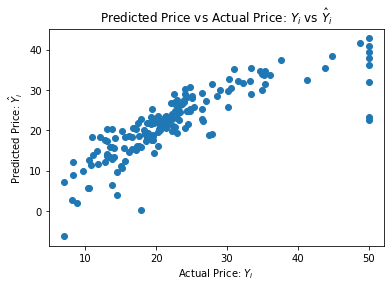

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)
Y_pred_train = lm.predict(X_train) #predictions on training data
Y_pred = lm.predict(X_test) #predictions on testing data
# We plot predicted Y (y-axis) against actual Y (x-axis). Perfect predictions will lie on the diagonal. We see the diagonal trend, suggesting a 'good' fit
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [9]:
#Let's get the coefficients
print('Intercept term: ',lm.intercept_) # This gives us the intercept term
print('Coefficients: \n',lm.coef_) # This gives us the coefficients (in the case of this model, just one coefficient)

Intercept term:  32.85893263408601
Coefficients: 
 [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]


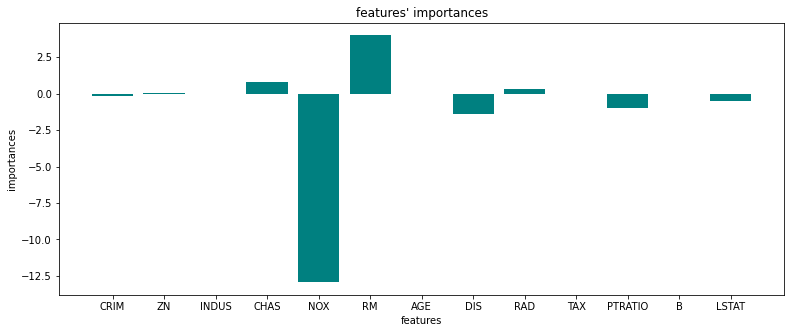

In [11]:
importances =lm.coef_

feature_names = data.columns
feature_names = feature_names[0:len(data.columns)-1]

x = feature_names
value_list = importances

plt.figure(figsize=(13,5))

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
mae = mean_absolute_error(Y_test,Y_pred)
print('Mean Absolute Error: ',mae)
rsq = r2_score(Y_train,Y_pred_train) #R-Squared on the training data
print('R-square, Training: ',rsq)
rsq = r2_score(Y_test,Y_pred) #R-Squared on the testing data
print('R-square, Testing: ',rsq)

Mean Squared Error:  28.530458765974675
Mean Absolute Error:  3.4550349322483545
R-square, Training:  0.7551332741779998
R-square, Testing:  0.6956551656111597


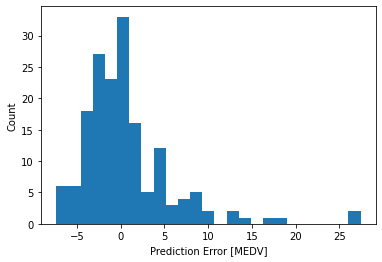

In [13]:
error = Y_test - Y_pred
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

# 2.Lasso Regression

In [14]:
#https://predictivemodeler.com/2019/08/19/py-lasso-boston-house-prices/

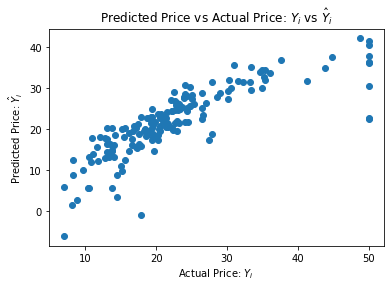

In [15]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1) #a higher value of alpha restricts the coefficients further
ls.fit(X_train,Y_train)
Y_pred_train = ls.predict(X_train) #predictions on training data
Y_pred = ls.predict(X_test) #predictions on testing data
# We plot predicted Y (y-axis) against actual Y (x-axis). Perfect predictions will lie on the diagonal. We see the diagonal trend, suggesting a 'good' fit
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [16]:
#Get mean squared error and R-square for both training & testing data
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error: on training data: ',mean_squared_error(Y_train,Y_pred_train), '| And on Testing data',mean_squared_error(Y_test,Y_pred))
print('R-Squared Error: on training data: ',r2_score(Y_train,Y_pred_train), '| And on Testing data',r2_score(Y_test,Y_pred))

Mean Squared Error: on training data:  20.07862315273765 | And on Testing data 30.653771741798355
R-Squared Error: on training data:  0.7484704833754667 | And on Testing data 0.6730050098150877


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(Y_train,Y_pred_train)
print('R-square, Training: ',rsq)
rsq = r2_score(Y_test,Y_pred)
print('R-square, Testing: ',rsq)

Mean Squared Error:  30.653771741798355
R-square, Training:  0.7484704833754667
R-square, Testing:  0.6730050098150877


In [18]:
#Let's get the coefficients
print('Intercept: ',ls.intercept_) # This gives us the intercept term
print('Coefficients: \n',ls.coef_) # This gives us the coefficients (in the case of this model, just one coefficient)

Intercept:  26.203668082786965
Coefficients: 
 [-0.14498288  0.0406458  -0.0674628   0.         -0.          3.79511624
 -0.01870347 -1.11734441  0.31433301 -0.01535548 -0.85375257  0.01150501
 -0.51268625]


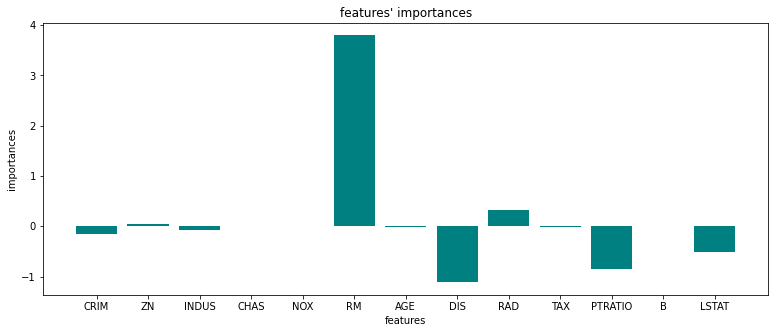

In [19]:
importances =ls.coef_

feature_names = data.columns
feature_names = feature_names[0:len(data.columns)-1]

x = feature_names
value_list = importances

plt.figure(figsize=(13,5))

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()

# 3.Ridge Regression

In [20]:
#https://predictivemodeler.com/2019/08/19/py-ridge-boston-house-prices/

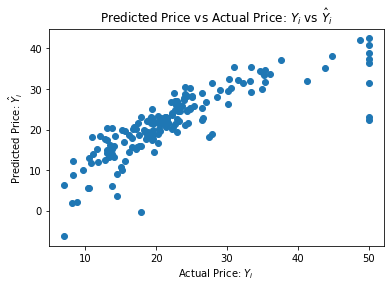

In [21]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=1) #a higher value of alpha restricts the coefficients further
rr.fit(X_train,Y_train)
Y_pred_train = rr.predict(X_train) #predictions on training data
Y_pred = rr.predict(X_test) #predictions on testing data
# We plot predicted Y (y-axis) against actual Y (x-axis). Perfect predictions will lie on the diagonal. We see the diagonal trend, suggesting a 'good' fit
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
print('Mean Squared Error: ',mse)
rsq = r2_score(Y_train,Y_pred_train)
print('R-square, Training: ',rsq)
rsq = r2_score(Y_test,Y_pred)
print('R-square, Testing: ',rsq)

Mean Squared Error:  29.294062013484975
R-square, Training:  0.7535758947696942
R-square, Testing:  0.6875095305967147


In [23]:
#Let's get the coefficients
print('Intercept: ',rr.intercept_) # This gives us the intercept term
print('Coefficients: \n',rr.coef_) # This gives us the coefficients (in the case of this model, just one coefficient)

Intercept:  28.880383249855875
Coefficients: 
 [-0.15284685  0.0397696  -0.05156612  0.63428674 -6.35714924  4.00925859
 -0.01709152 -1.27297943  0.32788793 -0.0143354  -0.92053665  0.01186824
 -0.48449948]


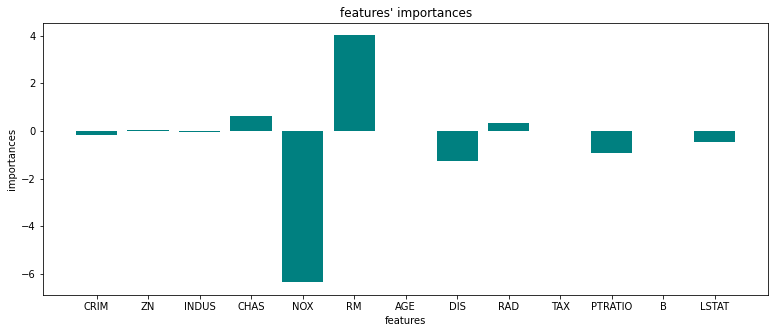

In [24]:
importances =rr.coef_

feature_names = data.columns
feature_names = feature_names[0:len(data.columns)-1]

x = feature_names
value_list = importances

plt.figure(figsize=(13,5))

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, value_list, color='teal')
plt.xlabel("features")
plt.ylabel("importances")
plt.title("features' importances")
plt.xticks(x_pos, x)

plt.show()